In [2]:
import numpy as np
import matplotlib.pyplot as plt

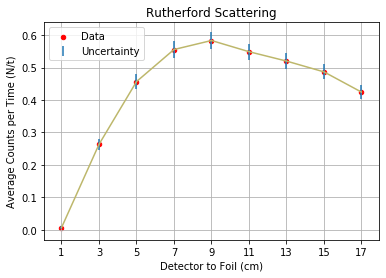

In [3]:
# discriminator 2-10
# amplifier 10V

# time of recording duration 300s
texp = 300

fig = plt.figure()

data = [[2],[84,78,75],[144,114,153],[176,164,160],[156,177,192],[165,160,169],[145,158,165],[150,140,148],[137,126,119]]

counts_avg = [2]
avg_error = [np.sqrt(2)]

for x in range(1,9):
    sum = (data[x][0]+data[x][1]+data[x][2])
    counts_avg.append(sum/3)
    avg_error.append(np.sqrt(sum)/3)

# 0.0 cm when tube is least distance
lengths = [1,3,5,7,9,11,13,15,17]

counts_AvgPerTime = []
for i in range(0,len(counts_avg)):
    avgPerTime = counts_avg[i] / texp
    avg_error[i] = avgPerTime*(avg_error[i]/counts_avg[i])
    counts_AvgPerTime.append(avgPerTime)


plt.errorbar(lengths,counts_AvgPerTime, yerr=avg_error, linestyle='none', label='Uncertainty')
plt.scatter(lengths,counts_AvgPerTime,s=20, c='red', label='Data')
plt.legend()
plt.plot(lengths,counts_AvgPerTime, c='darkkhaki')

plt.title("Rutherford Scattering")
plt.xlabel("Detector to Foil (cm)")
plt.xticks(lengths)
plt.ylabel("Average Counts per Time (N/t)")

plt.grid(True)

plt.show()

fig.savefig('counts_vs_distance_avg')



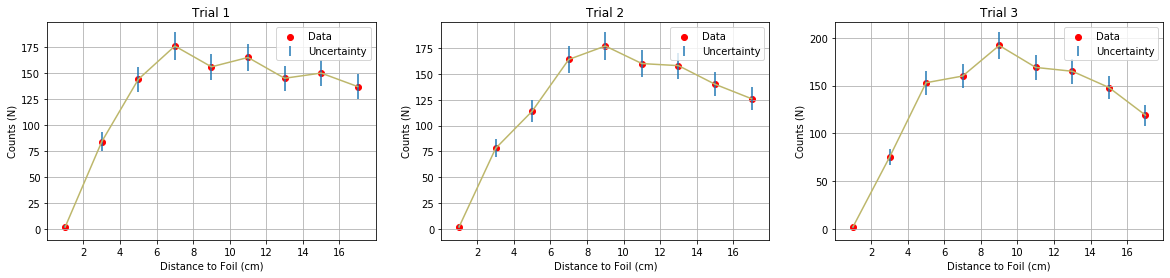

<Figure size 432x288 with 0 Axes>

In [4]:
counts1 = [2]
err1 = [np.sqrt(2)]
err2 = [np.sqrt(2)]
err3 = [np.sqrt(2)]
counts2 = [2]
counts3 = [2]
for x in range(1,len(data)):
    counts1.append(data[x][0])
    err1.append(np.sqrt(data[x][0]))
    
    counts2.append(data[x][1])
    err2.append(np.sqrt(data[x][1]))
    
    counts3.append(data[x][2])
    err3.append(np.sqrt(data[x][2]))

fig,a = plt.subplots(1,3)

#fig.set_figheight(21)
fig.set_figwidth(20)

a[0].errorbar(lengths,counts1,yerr=err1, linestyle="none", label="Uncertainty")
a[0].scatter(lengths,counts1,c="red", label="Data")
a[0].legend()
a[0].plot(lengths,counts1, c="darkkhaki")
a[0].set_title("Trial 1")
a[0].set_xlabel('Distance to Foil (cm)')
a[0].set_ylabel('Counts (N)')
a[0].grid(True)

a[1].errorbar(lengths,counts2,yerr=err2, linestyle="none", label="Uncertainty")
a[1].scatter(lengths,counts2,c="red", label="Data")
a[1].legend()
a[1].plot(lengths,counts2, c="darkkhaki")
a[1].set_title('Trial 2')
a[1].set_xlabel('Distance to Foil (cm)')
a[1].set_ylabel('Counts (N)')
a[1].grid(True)

a[2].errorbar(lengths,counts3,yerr=err3, linestyle="none", label="Uncertainty")
a[2].scatter(lengths,counts3,c="red", label="Data")
a[2].legend()
a[2].plot(lengths,counts3, c="darkkhaki")
a[2].set_title('Trial 3')
a[2].set_xlabel('Distance to Foil (cm)')
a[2].set_ylabel('Counts (N)')
a[2].grid(True)

plt.show()
plt.savefig('counts_vs_distance_trials')

C:\Users\vanda\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


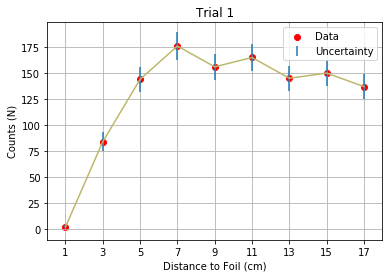

In [5]:
fig = plt.figure()

plt.errorbar(lengths,counts1,yerr=err1, linestyle="none", label="Uncertainty")
plt.scatter(lengths,counts1,c="red", label="Data")
plt.legend()
plt.plot(lengths,counts1, c="darkkhaki")
plt.title('Trial 1')
plt.xlabel('Distance to Foil (cm)')
plt.xticks(lengths)
plt.ylabel('Counts (N)')
plt.grid(True)

fig.show()

plt.savefig('counts_vs_distance_trial1.png')

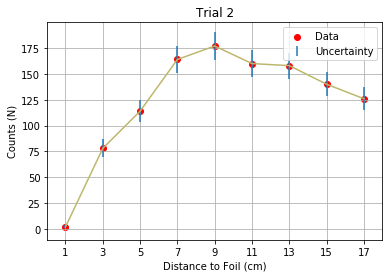

In [6]:
fig = plt.figure()

plt.errorbar(lengths,counts2,yerr=err2, linestyle="none", label="Uncertainty")
plt.scatter(lengths,counts2,c="red", label="Data")
plt.legend()
plt.plot(lengths,counts2, c="darkkhaki")
plt.title('Trial 2')
plt.xlabel('Distance to Foil (cm)')
plt.xticks(lengths)
plt.ylabel('Counts (N)')
plt.grid(True)

plt.show()

fig.savefig('counts_vs_distance_trial2.png')

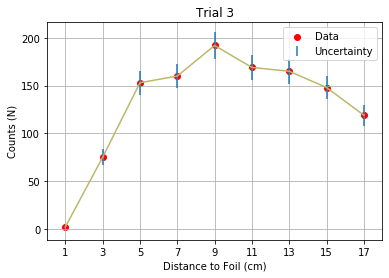

In [7]:
fig = plt.figure()

plt.errorbar(lengths,counts3,yerr=err3, linestyle="none", label="Uncertainty")
plt.scatter(lengths,counts3,c="red", label="Data")
plt.legend()
plt.plot(lengths,counts3, c="darkkhaki")
plt.title("Trial 3")
plt.xlabel('Distance to Foil (cm)')
plt.xticks(lengths)
plt.ylabel('Counts (N)')
plt.grid(True)

plt.show()

fig.savefig('counts_vs_distance_trial3.png')

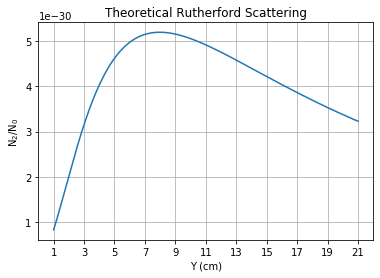

9.573984061166408e+28


In [82]:
rho = 19300 # density of gold in kg/m^3
NA = 6*(10**23) # avagadro's number
Ag = 197.2 # atomic wieght of gold in amu
A1 = np.pi*(0.027**2) - np.pi*(0.023**2) # gold annulus area in m^2
t = 2*(10**(-6)) # thickness of foil in m
A2 = np.pi*(0.0048**2) # area of detector
r1 = (2.7-2.3)/2 + 2.3 # radius - center of foil to collision
R1 = np.sqrt(0.0722**2+(r1)**2) # hypotenuse 1
z = 79 # proton number of gold
Z = 2 # proton number of Helium
e = 1.602*(10**(-19)) # elementary charge
E = 4.4*(10**(-6)) # average energy of scattered alpha particle in eV
n = (rho*NA/Ag)*A1*t
epsilon = 8.85418782*(10**(-12)) # permitivitty of free space
k = 1/(4*np.pi*epsilon)

def f(y):
    G = n*A2/((R1**2)*(r1**2)) * (Z**2)*(z**2)*(e**4)/(16*(E**2))
    x = 7.22
    f1 = 4*y*(r1**2)/((r1**2+y**2)**(3/2))
    f2 = x/np.sqrt(x**2+r1**2) * y/np.sqrt(y**2+r1**2)
    f3 = r1/np.sqrt(x**2+r1**2) * r1/np.sqrt(y**2+r1**2)
    return G*(k**2)*f1/((1-f2+f3)**2)
    
xtest = np.arange(1,21,0.01)

fig = plt.figure()

plt.plot(xtest,f(xtest))
plt.title('Theoretical Rutherford Scattering')
plt.xlabel('Y (cm)')
plt.xticks([1,3,5,7,9,11,13,15,17,19,21])
plt.ylabel('N$_2$/N$_0$')
plt.grid(True)

plt.show()

fig.savefig('theoretical.png')

tot = 0.0
for i in range(0,len(lengths)):
       tot += counts_AvgPerTime[i]/f(lengths[i])
        
print(tot/len(lengths))

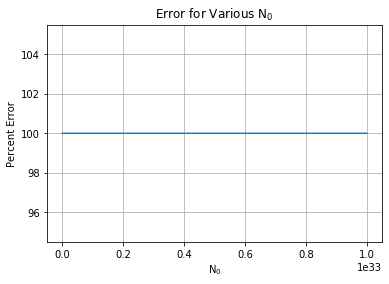

1000000000000000000000000000000
100.0


In [89]:
fig = plt.figure()

errors = []
N = np.arange( (10**(30)), (10**(33)),10**(29))
errors_avg = []
tot = 0

texp = 300

data = [[2],[84,78,75],[144,114,153],[176,164,160],[156,177,192],[165,160,169],[145,158,165],[150,140,148],[137,126,119]]

counts_avg = [2]

for x in range(1,9):
    sum = (data[x][0]+data[x][1]+data[x][2])
    counts_avg.append(sum/3)
    

# 0.0 cm when tube is least distance
lengths = [1,3,5,7,9,11,13,15,17]

counts_AvgPerTime = []
for i in range(0,len(counts_avg)):
    avgPerTime = counts_avg[i] / texp
    counts_AvgPerTime.append(avgPerTime)
    
rho = 19300 # density of gold in kg/m^3
NA = 6*(10**23) # avagadro's number
Ag = 197.2 # atomic wieght of gold in amu
A1 = np.pi*(0.027**2) - np.pi*(0.023**2) # gold annulus area in m^2
t = 2*(10**(-6)) # thickness of foil in m
A2 = np.pi*(0.0048**2) # area of detector
r1 = (2.7-2.3)/2 + 2.3 # radius - center of foil to collision
R1 = np.sqrt(0.0722**2+(r1)**2) # hypotenuse 1
z = 79 # proton number of gold
Z = 2 # proton number of Helium
e = 1.602*(10**(-19)) # elementary charge
E = 4.4*(10**(-6)) # average energy of scattered alpha particle in eV
n = (rho*NA/Ag)*A1*t
epsilon = 8.85418782*(10**(-12)) # permitivitty of free space
k = 1/(4*np.pi*epsilon)

def f(y):
    G = n*A2/((R1**2)*(r1**2)) * (Z**2)*(z**2)*(e**4)/(16*(E**2))
    x = 7.22
    f1 = 4*y*(r1**2)/((r1**2+y**2)**(3/2))
    f2 = x/np.sqrt(x**2+r1**2) * y/np.sqrt(y**2+r1**2)
    f3 = r1/np.sqrt(x**2+r1**2) * r1/np.sqrt(y**2+r1**2)
    return (k**2)*f1/((1-f2+f3)**2)

for num in N:
    tot = 0.0
    for i in range(len(lengths)):
        theory = ( num*f(lengths[i])/texp)
        diff = abs(theory - counts_AvgPerTime[i])
        tot += (diff/theory)*100

    avg = tot/len(lengths)
    errors_avg.append(avg)

plt.plot(N,errors_avg)
plt.xlabel('N$_0$')

plt.ylabel('Percent Error')
plt.title('Error for Various N$_0$')
plt.grid(True)

plt.show()
minValue = 10000
minInd = 0
for i in range(0,len(errors_avg)):
    if (errors_avg[i] < minValue):
        minValue = errors_avg[i]
        minInd = i

print(N[minInd])
print(errors_avg[minInd])

fig.savefig('various_N.png')

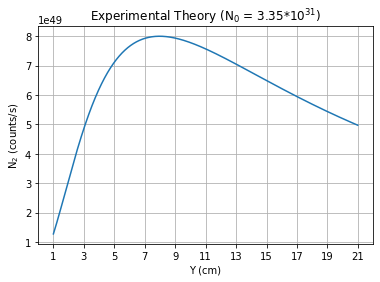

100.0

100.0

100.0

100.0

100.0

100.0

100.0

100.0

100.0

100.0


In [90]:
fig = plt.figure()

t = 300 # seconds we recorded our experiment, from experiment

N0 = 3.35*(10**(31)) # Theoretical N_0 to fit to our exp data???

plt.plot(xtest,N0*f(xtest)/(t), label = 'Theory')


plt.title('Experimental Theory (N$_0$ = 3.35$ * 10^{31}$)')
plt.xlabel('Y (cm)')
plt.xticks([1,3,5,7,9,11,13,15,17,19,21])
plt.ylabel('N$_2$ (counts/s)')
plt.grid(True)

plt.show()

fig.savefig('theoretical_scaled.png')

tot = 0.0
for i in range(0,len(lengths)):
    theory = N0*f(lengths[i])/t
    diff = abs(theory - counts_AvgPerTime[i])
    error = round((diff/theory)*100, 2)
    print(error)
    print()
    tot += error
    
print(tot/len(lengths))

In [97]:
def f1(y):
    G = n*A2/((R1**2)*(r1**2)) * (Z**2)*(z**2)*(e**4)/(16*(E**2))
    x = 7.22
    f1 = 4*y*(r1**2)/((r1**2+y**2)**(3/2))
    f2 = x/np.sqrt(x**2+r1**2) * y/np.sqrt(y**2+r1**2)
    f3 = r1/np.sqrt(x**2+r1**2) * r1/np.sqrt(y**2+r1**2)
    return (k**2)*f1/((1-f2+f3)**2)

In [98]:
T1=[]
T2=[]
for i in range(len(counts_AvgPerTime)):
    
    T1.append(counts_AvgPerTime[i]/(f1(lengths[i])))
    T2.append(counts_AvgPerTime[i]/(f(lengths[i])))

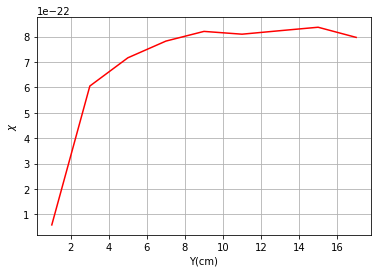

In [99]:
plt.plot(lengths,T1, color='r')
plt.ylabel("$\chi$")
plt.xlabel("Y(cm)")
plt.grid()
#fig=plt.figure()
fig.savefig('kekega1.png')

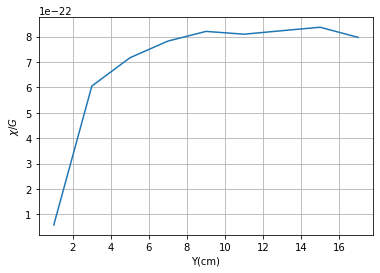

<Figure size 432x288 with 0 Axes>

In [100]:
plt.plot(lengths,T2)
plt.ylabel("$\chi/G$")
plt.xlabel("Y(cm)")
plt.grid()
fig=plt.figure()
fig.savefig('kekega.png')